<a href="https://colab.research.google.com/github/tenjust/testtttttttttt/blob/main/IMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import glob

path = '/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data'
all_files = glob.glob(path + "/*.csv")

list = []

for filename in all_files:
  print(filename)
  df = pd.read_csv(filename, sep=',')
  list.append(df)

list[0]

/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1128-walk00.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1128-circle01.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1128-circle02.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1128-circle03.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1128-circle04.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1128-table.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1128-walk01.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1128-table2.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1128-walk0.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1129-static.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1129-walk2-01.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1129-walk2-02.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY25z-1129-walk2-03.csv
/content/drive/Shareddrives/感測技術於運動科學之應用/imu_data/GY

,Time,Ax,Ay,Az,Gx,Gy,Gz,Yaw,Pitch,roll
0,18:02:07.009695,20838,19752,-162,-1771,-1025,579,3,87,150
1,18:02:07.018900,22458,16028,-2308,-1610,-1954,-265,1,89,147
2,18:02:07.030250,21186,9408,-2990,-1383,-2371,-1184,49,89,-164
3,18:02:07.039693,20068,2608,-4200,-1201,-2446,-1818,170,88,-44
4,18:02:07.050959,-30874,-3532,-3994,-964,-2150,-1998,170,86,-85
...,...,...,...,...,...,...,...,...,...,...
965,18:02:18.437718,27620,8072,-764,-204,2800,-397,15,60,-176
966,18:02:18.449061,26230,2562,-4562,-315,3072,-670,16,59,-176
967,18:02:18.458697,26870,-2178,-5362,-24,3380,-762,17,57,-175
968,18:02:18.469602,23590,-4054,-5924,-32,3418,-746,17,55,-175


In [ ]:
data_num = 970

def acc2dist(n):
  v = []
  for j in range(1,4):
    v.append([])
    for i in range(data_num-1):

      v[j-1].append((list[n].iloc[i][j] + list[n].iloc[i+1][j])/16384)

  dist = []
  for j in range(3):
    dist.append([])
    for i in range(data_num-2):
      dist[j].append(v[j][i] + v[j][i+1])

  return dist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_3d(dist):

  # 建立 3D 圖形
  fig = plt.figure()
  ax = fig.gca(projection='3d')

  # 3D 座標資料
  z = dist[2]
  x = dist[0]
  y = dist[1]

  # 繪製 3D 曲線
  ax.plot(x, y, z, color='gray', label='My Curve')

  # 繪製 3D 座標點
  ax.scatter(x, y, z, c=z, cmap='jet', label='My Points')

  # 顯示圖例
  ax.legend()

  # 顯示圖形
  plt.show()

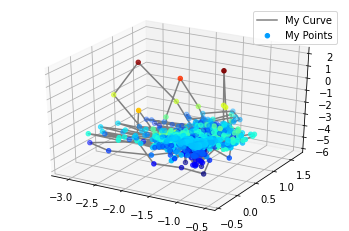

In [ ]:
draw_3d(acc2dist(10))

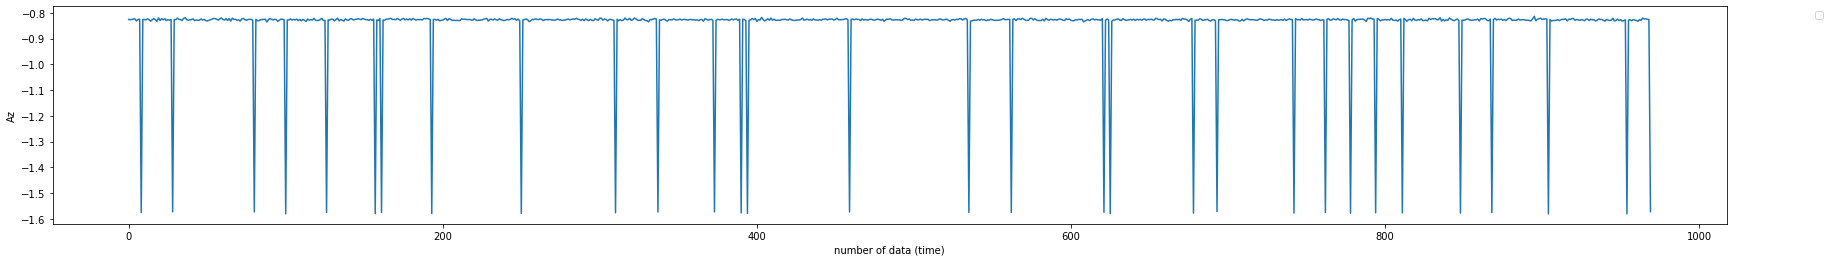

In [ ]:
# print(list[0].iloc[:,2])
plt.figure(figsize=(30,4))
plt.plot(list[9].iloc[:,3]/16384)
# plt.plot(list[0].iloc[:,2])
plt.xlabel('number of data (time)')
plt.ylabel('Az')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

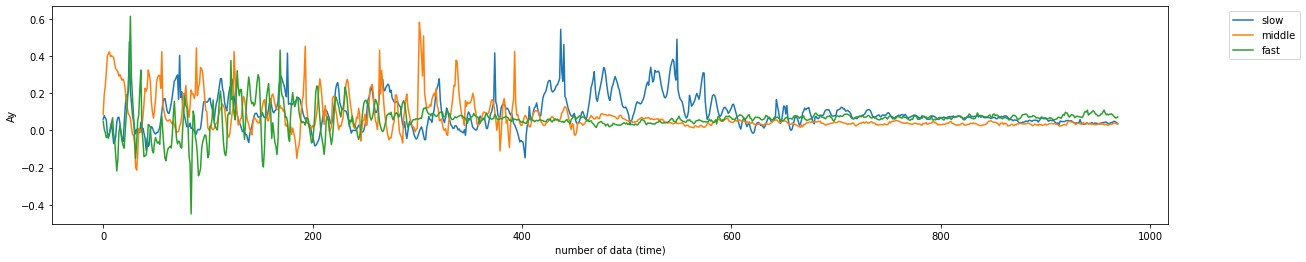

In [ ]:
# print(list[0].iloc[:,2])
plt.figure(figsize=(20,4))
# plt.plot(list[0].iloc[:,2].rolling(7).mean())
# plt.plot(list[0].iloc[:,2])
plt.plot(list[10].iloc[:,2]/16384, label = 'slow')
plt.plot(list[11].iloc[:,2]/16384, label = 'middle')
plt.plot(list[12].iloc[:,2]/16384, label = 'fast')
plt.xlabel('number of data (time)')
plt.ylabel('Ay')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
list[9]

,Time,Ax,Ay,Az,Gx,Gy,Gz,Yaw,Pitch,roll
0,17:49:01.091684,-5384,1052,-13528,0,1,0,-21,-21,-175
1,17:49:01.100426,-5366,1006,-13550,0,-2,-1,-21,-21,-175
2,17:49:01.112011,-9466,984,-13530,1,0,-1,-21,-21,-175
3,17:49:01.120912,-5406,1052,-13496,0,0,0,-21,-62,-175
4,17:49:01.132874,-5426,994,-13496,-1,-1,0,-21,-21,-175
...,...,...,...,...,...,...,...,...,...,...
965,17:49:12.490047,-5440,1022,-13500,0,0,0,-21,-21,-175
966,17:49:12.499247,-5352,1018,-13486,-4,0,-2,-21,-21,-175
967,17:49:12.510766,-5412,1074,-13526,-2,-1,2,-21,-21,-175
968,17:49:12.520293,-5388,1040,-13528,0,1,-1,-21,-21,-175
